# Stock market Price Prediction using machine learning in Python

In [14]:
!pip install chart-studio

### This step imports necessary libraries for data manipulation (Pandas and NumPy), visualization (Matplotlib, Plotly), machine learning model (Linear Regression), and evaluation metrics.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

			

### Here, it reads a CSV file (‘tesla.csv’) into a Pandas DataFrame, displays the first few rows, and converts the ‘Date’ column to a datetime format.

In [31]:
Tesla_data = pd.read_csv('tesla.csv')
Head_data = Tesla_data.head()
print(Head_data)

         Date       Open   High        Low      Close  Adj Close    Volume
0  29-06-2010  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  30-06-2010  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  01-07-2010  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  02-07-2010  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  06-07-2010  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [35]:
Head_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


### This prints information about the data, including the range of dates and the total number of days.

In [39]:
Tesla_data['Date'] = pd.to_datetime(Tesla_data['Date'], format='%d-%m-%Y')
print(f'Dataframe contains stock prices between {Tesla_data.Date.min()} {Tesla_data.Date.max()}')
print(f'Total days = {(Tesla_data.Date.max() - Tesla_data.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


### This creates a box plot to visualize the distribution of stock prices.

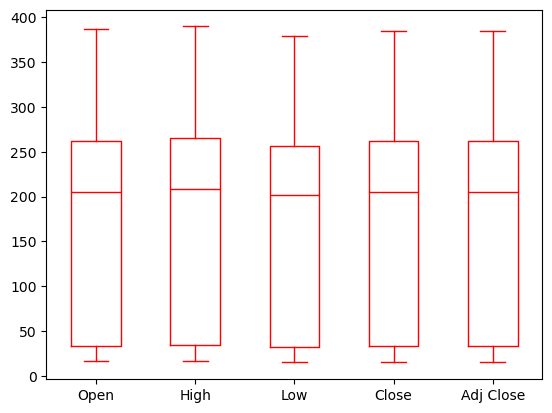

In [53]:
Tesla_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box',color='red')


### This defines the layout for Plotly visualizations, including the title and axis titles &  creates a Plotly figure for visualizing stock prices over time.

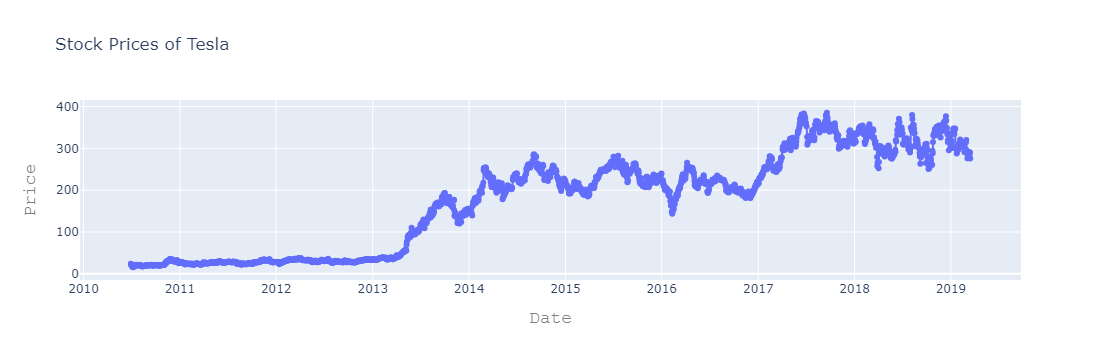

In [77]:



# Create the layout
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Create the data
data = [go.Scatter(x=Tesla_data['Date'], y=Tesla_data['Close'], mode='lines+markers', name='Tesla Close Price')]

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()


### This splits the data into training and testing sets for model training and evaluation.

In [81]:
X = np.array(Tesla_data.index).reshape(-1, 1)
Y = Tesla_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1535, 1)
X_test shape: (658, 1)
Y_train shape: (1535,)
Y_test shape: (658,)


## Feature Scaling
### The FPS counter is stopped, and elapsed time and approximate FPS are printed to the console.

In [87]:
scaler = StandardScaler().fit(X_train)

X_train shape: (1535, 1)
X_test shape: (658, 1)
Y_train shape: (1535,)
Y_test shape: (658,)


### This creates a linear regression model and fits it to the training data.

In [89]:
lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression()

### This creates a Plotly figure showing actual and predicted values for the training dataset.

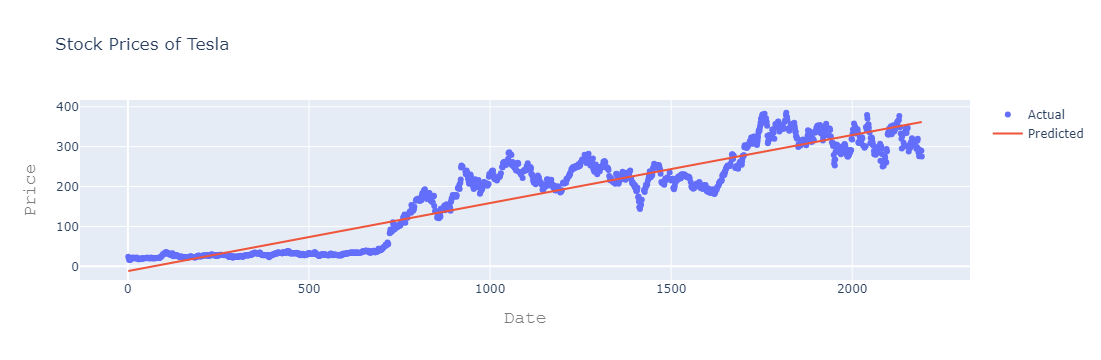

In [97]:
trace0 = go.Scatter(x=X_train.T[0], y=Y_train, mode='markers', name='Actual')
trace1 = go.Scatter(x=X_train.T[0], y=lm.predict(X_train).T, mode='lines', name='Predicted')
plot2 = go.Figure(data=[trace0, trace1], layout=layout)
plot2.show()

### This calculates and prints evaluation metrics such as R-squared and Mean Squared Error for the linear regression model on both the training and testing sets.

In [102]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845



# conclusion : 
### Metrics:
#### R² Score (Coefficient of Determination):

Train: 0.866
Test: 0.861

#### Mean Squared Error (MSE):

Train: 1821.38
Test: 1780.99
Interpretation:
### R² Score:

Train (0.866): This value indicates that approximately 86.6% of the variance in the training data can be explained by the model. This is quite high, suggesting that the model fits the training data well.
Test (0.861): This value indicates that approximately 86.1% of the variance in the test data can be explained by the model. This is also high, indicating good generalization to unseen data.
Conclusion: The R² scores are very close for both training and test data, which suggests that the model generalizes well and does not overfit the training data.

### Mean Squared Error (MSE):

Train (1821.38): This is the average squared difference between the predicted and actual values on the training data. Lower MSE values indicate better model performance.
Test (1780.99): This is the average squared difference between the predicted and actual values on the test data. The test MSE is slightly lower than the training MSE.
Conclusion: The MSE values are relatively close, with the test set having a slightly lower error. This suggests that the model performs consistently across both training and test datasets.

### Overall Conclusion:
The overall purpose of this code is to load, visualize, and evaluate the stock prices for Tesla using a linear regression model.
The model shows strong performance with high R² scores, indicating that it explains a large proportion of the variance in both training and test data.
The MSE values are comparable, suggesting that your model is generalizing well to new data and not overfitting.
The slight difference in MSE between training and testing is normal and indicates that your model is not overfitting excessively.